In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
plt.rcParams['image.cmap'] = 'RdBu'
import numpy as np
# Import custom code
from erpsc.count_hack import Count
from erpsc.core.io import save_pickle_obj, load_pickle_obj
import csv
import re

###### load in terms and count, and filter for words with 100+ occurrences

138
['action', 'activation', 'acuity', 'adaptation', 'addiction', 'anticipation', 'anxiety', 'arousal', 'association', 'association learning', 'attention', 'auditory perception', 'balance', 'categorization', 'circadian rhythm', 'cognitive control', 'color perception', 'communication', 'competition', 'concept', 'consciousness', 'consolidation', 'context', 'coordination', 'decision', 'decision making', 'detection', 'discrimination', 'Dyslexia', 'eating', 'efficiency', 'effort', 'emotion', 'emotion regulation', 'empathy', 'encoding', 'episodic memory', 'excitation', 'expectancy', 'expertise', 'extinction', 'facial expression', 'familiarity', 'fatigue', 'fear', 'feature extraction', 'filtering', 'fixation', 'focus', 'form perception', 'gaze', 'generalization', 'goal', 'hyperactivity', 'imagery', 'imagination', 'impulsivity', 'induction', 'inference', 'inhibition', 'insight', 'integration', 'intelligence', 'intention', 'interference', 'judgment', 'knowledge', 'language', 'language processin

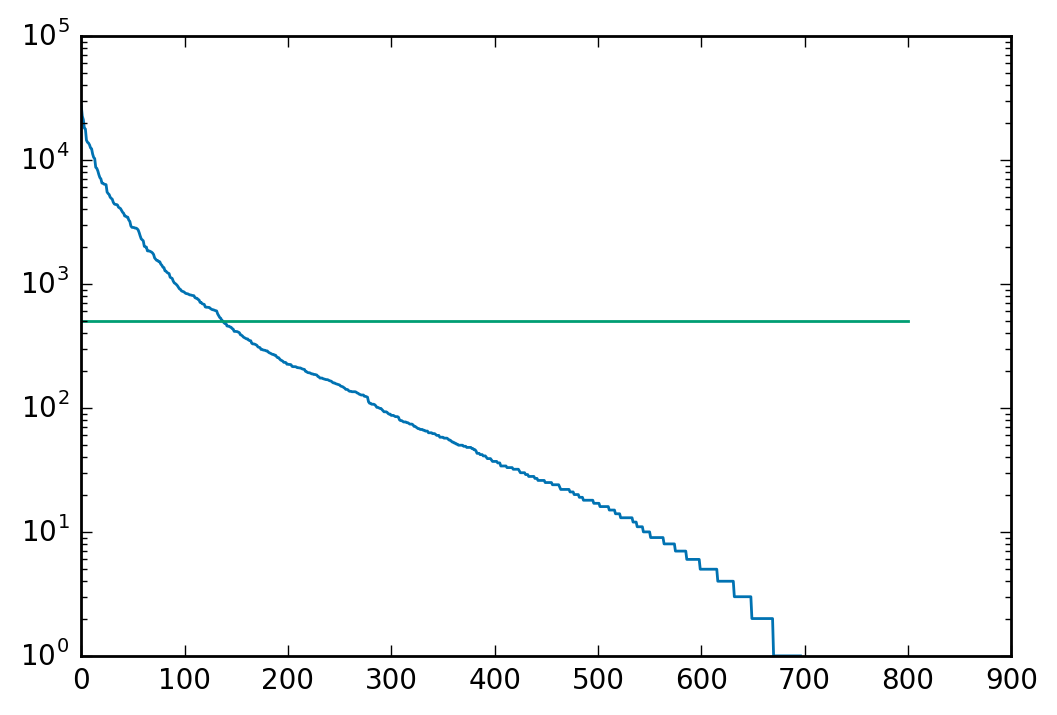

In [63]:
# load in terms and count
terms_file = './data_pubmed/term_count_neuro.csv'
terms = []
terms_count = []
with open(terms_file, 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for row in spamreader:
        terms.append(row[0])
        terms_count.append(int(row[1]))

terms_count = np.asarray(terms_count)
count_thresh = 500.
print len(np.where(terms_count>=count_thresh)[0])
t_sorted = np.sort(terms_count)
plt.semilogy(t_sorted[::-1])
plt.plot([1.,800.],[count_thresh]*2)

# threshold by counts
terms_thr = [terms[idx] for idx in np.where(terms_count>=count_thresh)[0]]
print terms_thr

with open('./data_pubmed/terms_thr_neuro.csv', 'wb') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',')
    for t in enumerate(terms_thr):
        spamwriter.writerow(t)

In [31]:
#scrape for pairwise counts in neuro base
base_phrase_neuro = ('AND('+
                '("fmri"OR"neuroimaging")OR'+
                '("eeg"OR"electroencephalography")OR'+
                '("meg"OR"magnetoencephalography")OR'+
                '("ecog"OR"electrocorticography")OR'+
                '("lfp"OR"local field potential")OR'+
                '("single unit"OR"single-unit"OR"single neuron")OR'+
                '("calcium imaging")'
                ')')
#244972 total
countsmat = Count()
countsmat.set_terms(terms_thr[:])
countsmat.scrape_pairs(db='pubmed', base_phrase=base_phrase_neuro)

0 pain
1 pattern recognition
2 perception
3 phonetics
4 planning
5 priming
6 problem solving
7 psychosis
8 reading
9 reasoning
10 recall
11 recognition
12 resource
13 response inhibition
14 retention
15 retrieval
16 reward processing
17 rhythm
18 risk
19 routine
20 rule
21 salience
22 search
23 selective attention
24 semantic processing
25 short term memory
26 skill
27 sleep
28 social cognition
29 spatial attention
30 speech perception
31 strategy
32 Strength
33 stress
34 task difficulty
35 theory of mind
36 thought
37 transduction
38 uncertainty
39 utility
40 valence
41 verbal memory
42 visual acuity
43 visual attention
44 visual pattern recognition
45 visual perception
46 word recognition
47 working memory


In [62]:
# save to file
countsmat.dat_numbers
np.savetxt('paircount_PMneuro.csv', countsmat.dat_numbers, delimiter=',')